## Fire Weather Index (FWI) Prediction for Algerian Forest Fires using Multiple Linear Regression

**Algerian Forest Fires Dataset Information:**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

**Attributes Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [112]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
#loading the algerian_forest dataset into data frame using pandas
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

In [114]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [116]:
#missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Adding new column with region

In [117]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [118]:
df["Region"]=df["Region"].astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [120]:
df.iloc[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [121]:
#removing 123 row
df = df.drop(123).reset_index(drop = True)

In [122]:
df.iloc[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [123]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [124]:
#droping the row of missing values
df = df.dropna().reset_index(drop=True)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [126]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [127]:
# Listing out column names to check
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [128]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()

In [129]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [131]:
#converting the data types from object to int and float as required
#Changing the required columns as integer data type
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [133]:
#Changing the other columns to Float data type
column_obj = [col for col in df.columns if df[col].dtype=='O']
for col in column_obj:
    if col != "Classes":
        df[col] = df[col].astype(float)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [135]:
# Checking Unique values of Classes column
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

Looks like the values were misspaced so we can use str.strip() method

In [136]:
# Striping mispaced values
df["Classes"] = df["Classes"].str.strip()

In [137]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [138]:
#lets save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index = False)

## Exploratory Data Analysis

In [139]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**Canadian Forest Fire Weather Index (FWI) System**

This column can be considered for Regression problem

<Axes: >

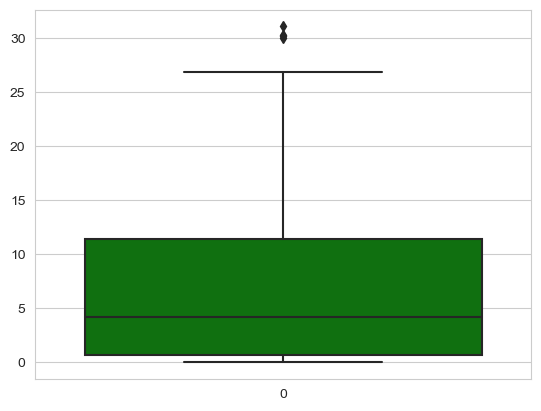

In [140]:
#boxplot
sns.boxplot(df["FWI"],color='g')

**Monthwise Fire Analysis**

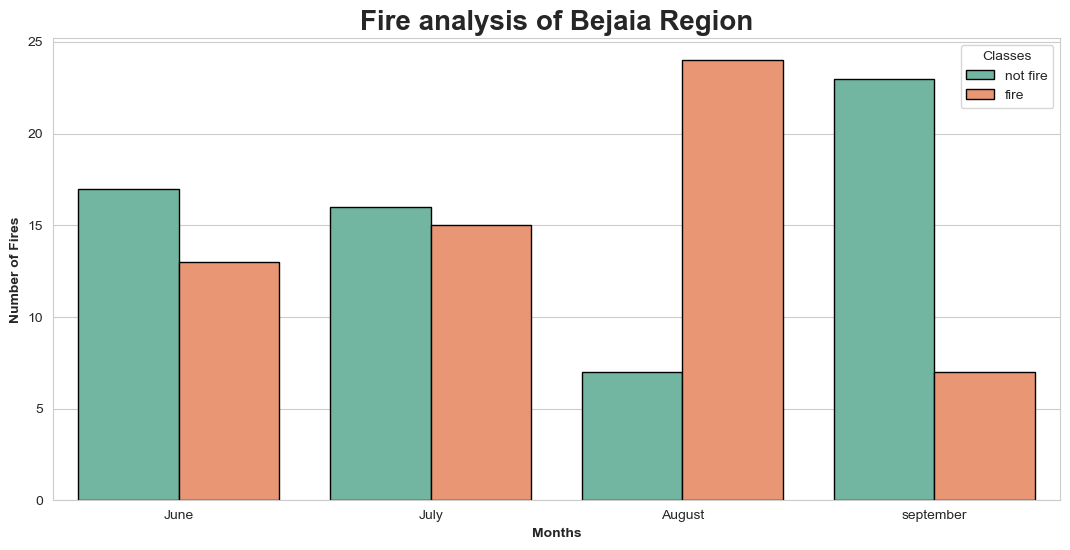

In [141]:
#fire analysis of Bejaia Region
dftemp = df.loc[df["Region"]==0]
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = dftemp,palette= 'Set2',ec = 'black' )
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of Bejaia Region",weight= "bold",fontsize=20)
plt.show()

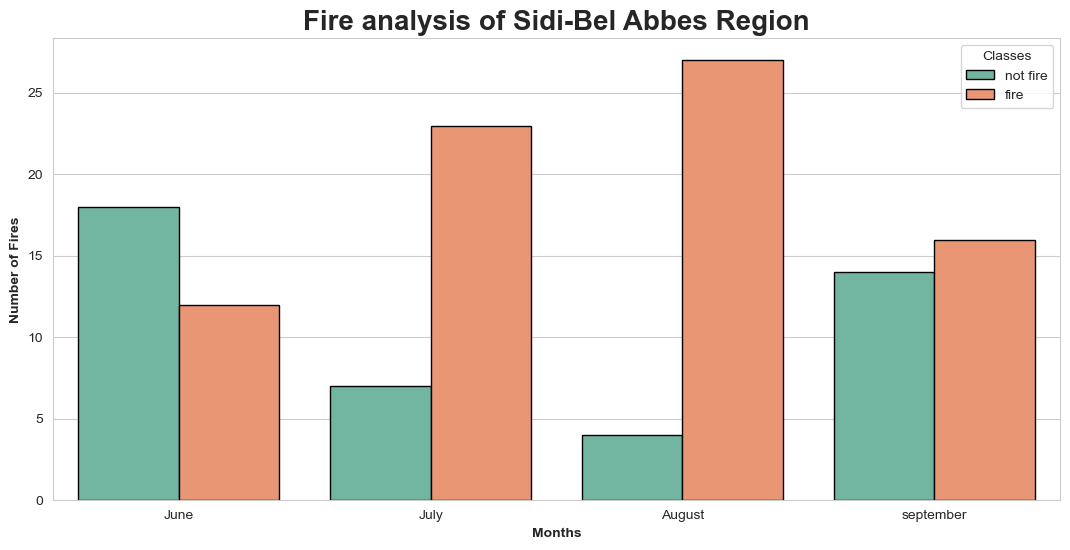

In [142]:
#fire analysis of Sidi-Bel Abbes Region
dftemp1 = df.loc[df["Region"]==1]
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = dftemp1,palette= 'Set2',ec = 'black' )
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of Sidi-Bel Abbes Region",weight= "bold",fontsize=20)
plt.show()

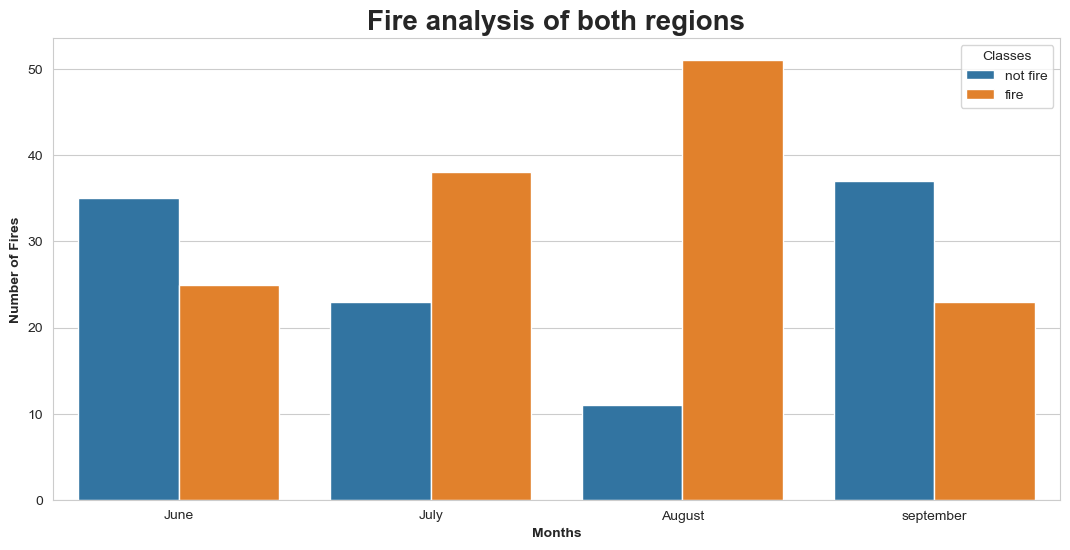

In [143]:
#Fire analysis of both regions combined
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue = "Classes",data = df)
plt.xticks(np.arange(4),["June","July","August","september"])
plt.xlabel("Months",weight="bold")
plt.ylabel("Number of Fires",weight ="bold")
plt.title("Fire analysis of both regions",weight= "bold",fontsize=20)
plt.show()

**Observations**

1. August has the highest number of fires for both Regions.
2. September has the least number of fires in Bejaia region and June has the least number of fires in Sidi-Bel Abbes region
3. When both regions combined June,July and August have the highest number of fires. Whereas there are fewer fires in September.   

In [144]:
#dropping unwanted features 
df.drop(["day","month","year"],axis=1,inplace=True)

In [145]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [146]:
#categories in classes
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [147]:
#Encoding of the categories in classes to 0 and 1
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [149]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

**Correlation**

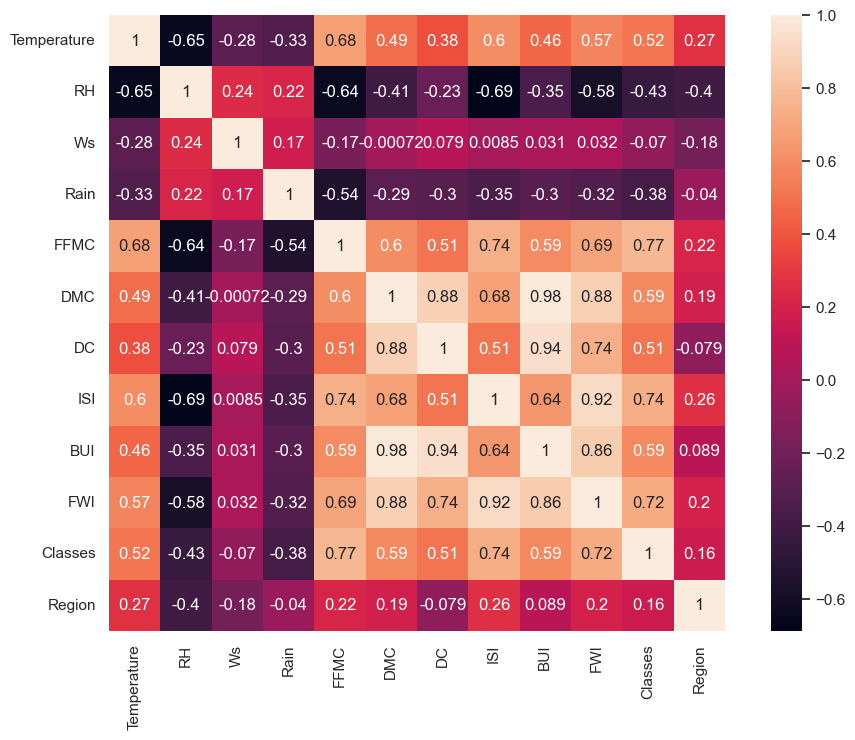

In [160]:
# Correlation chart
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
hm = sns.heatmap(df.corr(),annot=True, square=True)
plt.show()

**Visualization of Distribution**

C:\Users\k sai manas\AppData\Local\Temp\ipykernel_15836\880357136.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


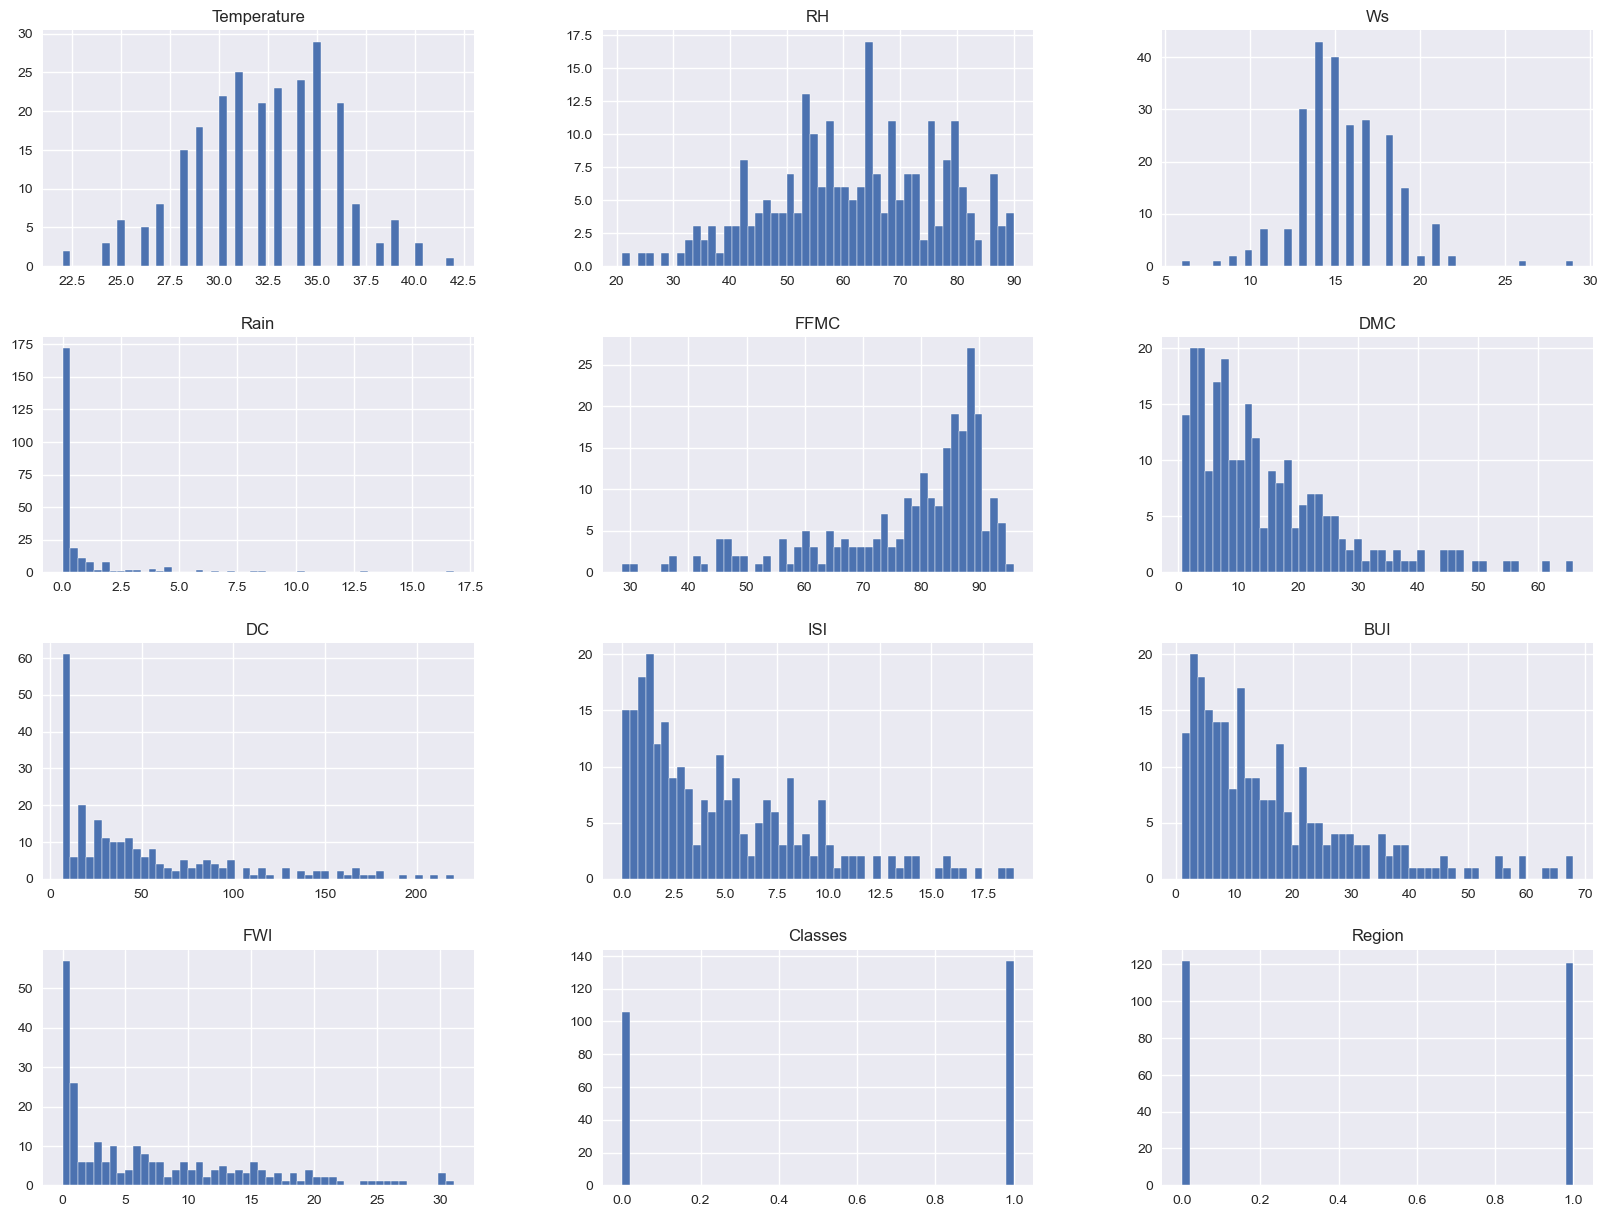

In [163]:
#Plot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

**Charts**

In [170]:
#percentage for pie chart
percentage = df["Classes"].value_counts(normalize = True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

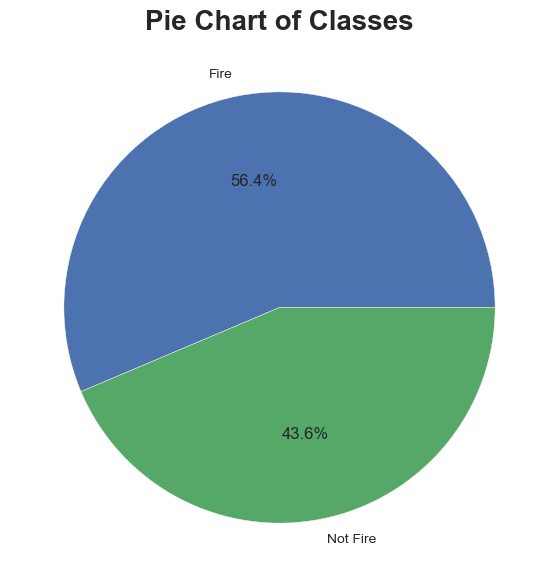

In [171]:
#plotting piechart
plt.figure(figsize=(12,7))
plt.pie(percentage,autopct="%1.1f%%",labels=["Fire","Not Fire"])
plt.title("Pie Chart of Classes",weight = "bold",fontsize = 20)
plt.show()

## Feature Engineering

In [214]:
#Independent and Dependent features
X = df.drop("FWI",axis = 1)
y  = df["FWI"]

In [215]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [216]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

**Data Splitting**

In [217]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [218]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

**Feature Selection**

In [219]:
#Feature selection based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

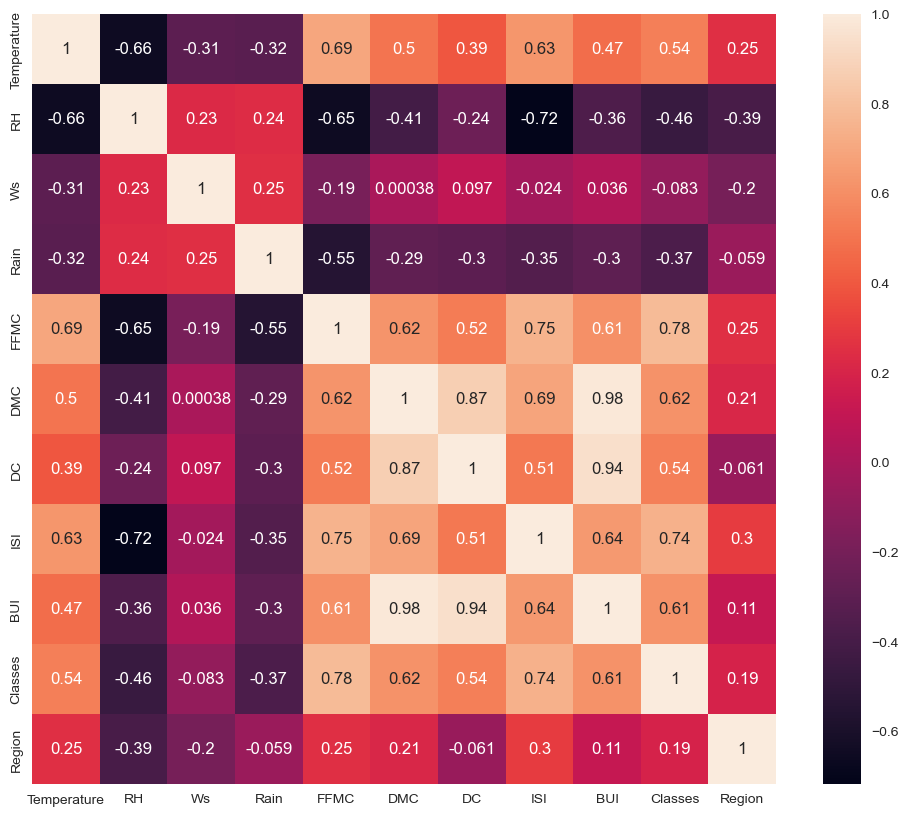

In [220]:
#Check for multicollinearity
plt.figure(figsize = (12,10))
sns.heatmap(X_train.corr(),annot = True)

In [221]:
def correlation(dataset,threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if abs(corr_matrix.iloc[i,j])>threshold and abs(corr_matrix.iloc[i,j])!=1 :
                col_name  = corr_matrix.columns[i]
                col_cor.add(col_name)
    return col_cor

In [222]:
#threshold--Domain expertise
correlation(X_train,0.85)

{'BUI', 'DC', 'DMC'}

Here BUI,DC and DMC are highly correlated values. Dropping any two columns from idependent features with correlation values more than 0.85 in order to prevent from multicollinearity.

In [223]:
X_train.drop(["BUI","DC"],axis = 1,inplace = True)
X_test.drop(["BUI","DC"],axis = 1,inplace = True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

**Feature Scaling or Standardization**

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [225]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

**Box Plots To understand Effect Of Standard Scaler**

C:\Users\k sai manas\AppData\Local\Temp\ipykernel_15836\3330055367.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

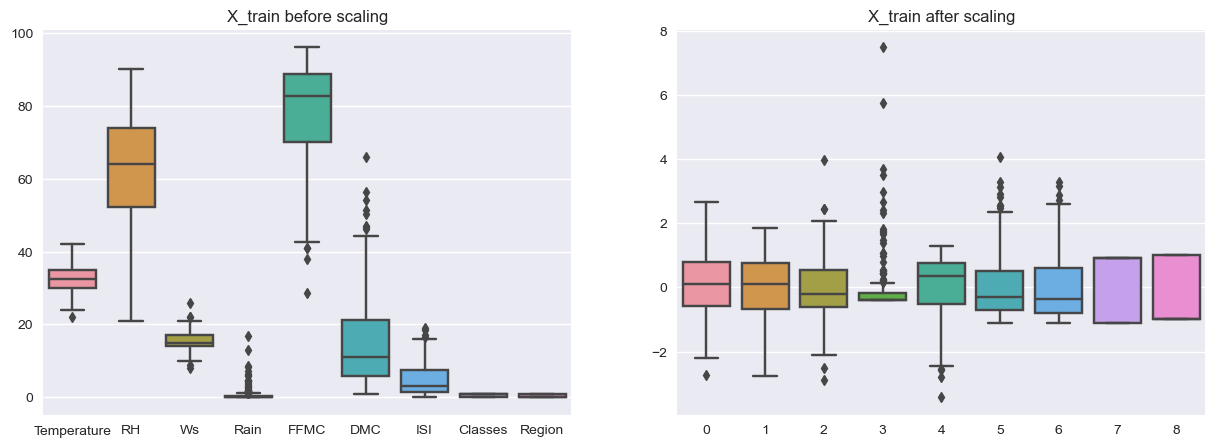

In [227]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

## Model Development

**1. Linear Regression Model**

Mean Absolute Error 0.5468236465249987
R2 Score 0.9847657384266951


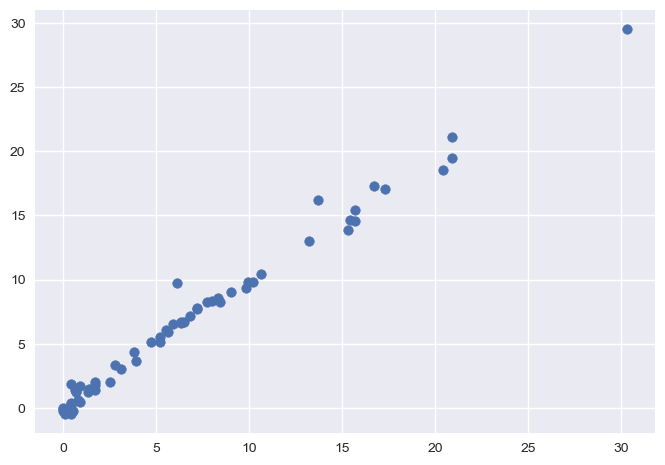

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**2. Lasso Regression**

Mean Absolute Error 1.1331759949144085
R2 Score 0.9492020263112388


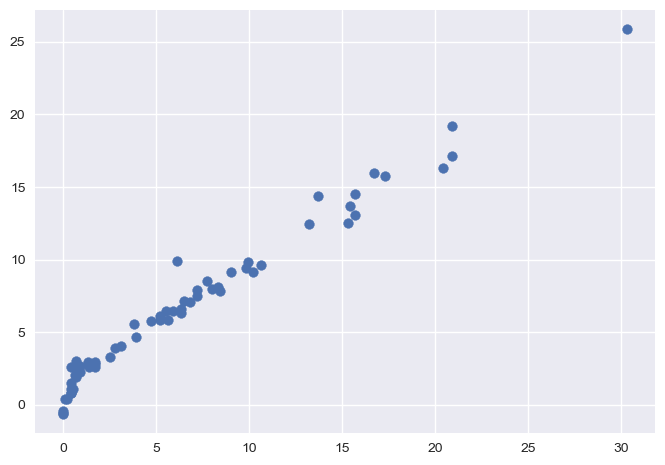

In [229]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**Cross Validation Lasso**

Mean Absolute Error 0.6199701158263433
R2 Score 0.9820946715928275


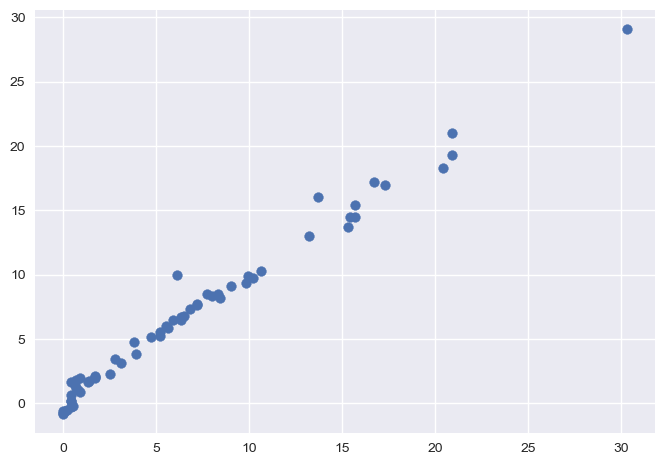

In [230]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**3. Ridge Regression Model**

Mean absolute error 0.5642305340105693
R2 Score 0.9842993364555513


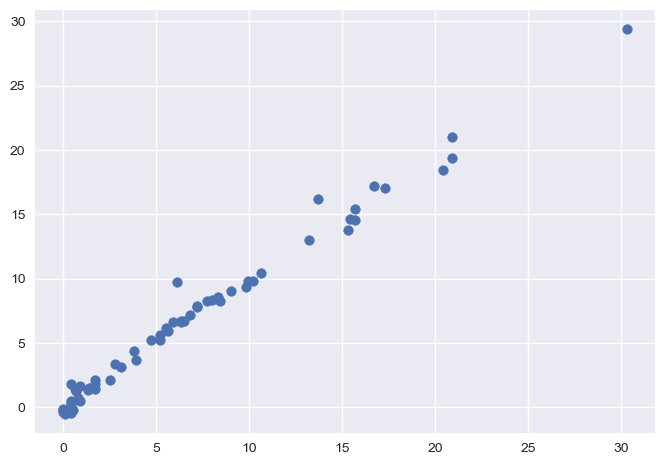

In [231]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

**Cross Validation Ridge**

Mean Absolute Score 0.5642305340105693
R2 Score 0.9842993364555513


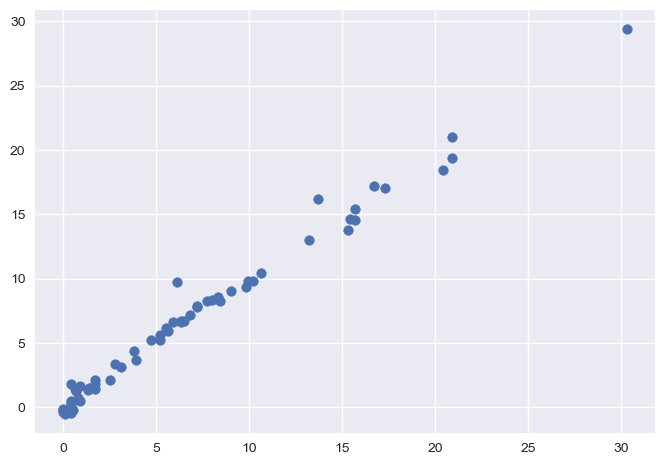

In [232]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

In [233]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

**4. Elasticnet Rigression**

Mean Absolute Score 1.8822353634896
R2 Score 0.8753460589519703


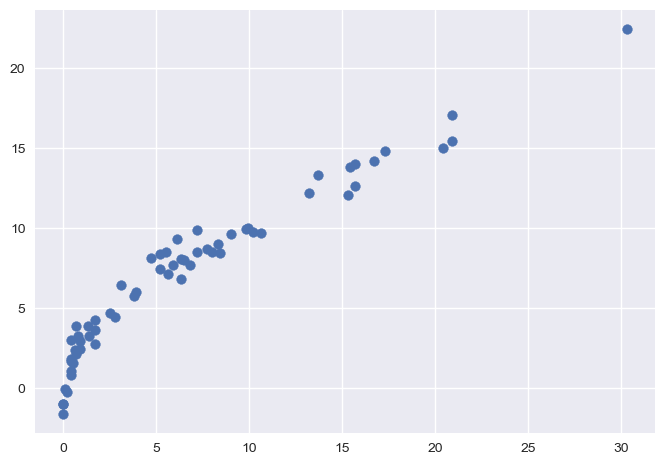

In [236]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

**Cross Validation Elasticnet Reression**

Mean Absolute Score 0.6575946731430904
R2 Score 0.9814217587854941


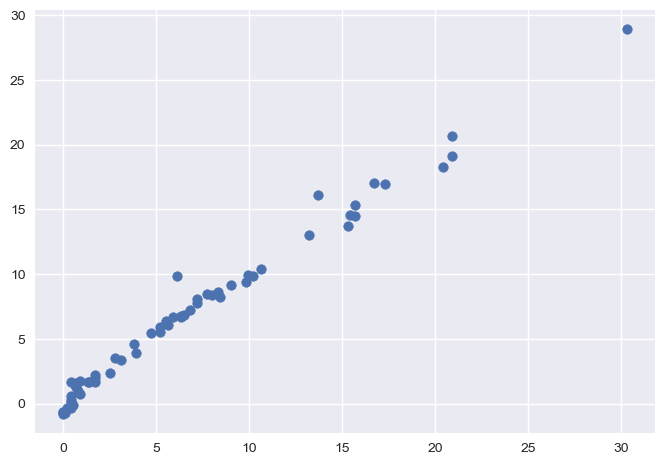

In [237]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv = ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Score",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

## Model Serialization

**Pickle the machine learning models,preprocessing model starndarscaler**

In [239]:
#considering ridge to pickle as ridge has good accuracy and zero cost function along with scaler as we need to scale the input data for prediction.
import pickle
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(ridge,open("ridge.pkl",'wb'))